In [ ]:
import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
x = np.linspace(0, np.pi, 100)
tau = np.linspace(0.5, 10, 100)

def f1(x, tau, beta):
    return np.sin(x * tau) * x * beta
def f2(x, tau, beta):
    return np.sin(x * beta) * x * tau


fig, ax = plt.subplots()
controls = iplt.plot(x, f1, tau=tau, beta=(1, 10, 100), label="f1")
iplt.plot(x, f2, controls=controls, label="f2")
_ = plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
#from matplotlib.animation import FuncAnimation
import random
%matplotlib widget
# initial data
x = [random.randint(1,100)]
y = [random.randint(1,100)]
 
# creating the figure and axes object

# update function to update data and plot
def update(frame):
    # updating the data by adding one more point
    x.append(random.randint(1,100))
    y.append(random.randint(1,100))
 
    ax.clear()  # clearing the axes
    ax.scatter(x,y, s = y, c = 'b', alpha = 0.5)  # creating new scatter chart with updated data
    fig.canvas.draw()  # forcing the artist to redraw itself



In [ ]:
fig, ax = plt.subplots()
plt.show()


In [1]:
import numpy as np
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from scipy.optimize import NonlinearConstraint
import pandas as pd

In [2]:
m = pd.read_csv("I(max).csv")
m = m.round({"v АК": 2, "v ЦН": 2})

In [ ]:
def target_function(x, y):
    x = np.round(x, 2)
    y = np.round(y, 2)
    if x < 0.8:
        x = 0.8
    if x > 2.9:
        x = 2.9
    if y < 0.8:
        y = 0.8
    if y > 2.9:
        y = 2.9
    while m.loc[(m["v АК"] == x) & (m["v ЦН"] == y)].empty== True:
        x += 0.01
        y += 0.01
        x = np.round(x, 2)
        y = np.round(y, 2)
    return m.loc[(m["v АК"] == x) & (m["v ЦН"] == y)].iloc[0, 2]

In [24]:
z=np.ndarray([200,200])
a=m['I(max)'].to_numpy()
for i in range(round(len(m)/200)):
    for k in range(200):
        z[k][i]=a[200*i+k]
#z=np.rot90(z)


In [7]:
%matplotlib widget

In [ ]:
for i in range(2):
    plt.plot(np.arange(200),z[i])

Text(0.5, 0.5, 'Title along Y axis')

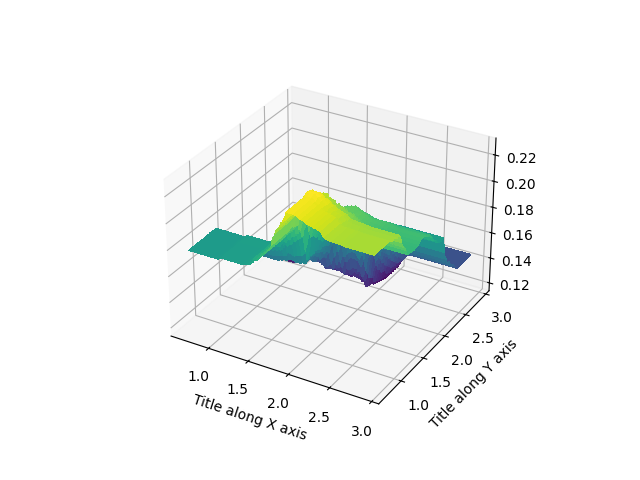

In [25]:
fig = plt.figure()
#projection='3d'
ax = plt.axes(projection='3d')
X=np.linspace(m['v АК'].min(),m['v АК'].max(),200)
Y=np.linspace(m['v АК'].min(),m['v АК'].max(),200)
# Задаем сетку точек (x, y)
X, Y = np.meshgrid(X,Y)

# Отображаем поверхность
ax.plot_surface(X,Y,z, cmap='viridis', linewidth=1, antialiased=False)
ax.set_xlabel('Title along X axis')

# Можно также установить заголовки по осям Y и/или показать график
ax.set_ylabel('Title along Y axis')
